In [148]:
### Motor Imagery EEG Data Loading and Visualization

In [149]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import matplotlib.pyplot as plt
import numpy as np

In [150]:
subject = 2
runs = [6, 10, 14]     # all Task 4: imagined fists vs feet

fnames = eegbci.load_data(subject, runs)
raw_list = [read_raw_edf(f, preload=True) for f in fnames]

raw = concatenate_raws(raw_list)



Extracting EDF parameters from /Users/light/Desktop/university/aml/datasets/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/light/Desktop/university/aml/datasets/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/light/Desktop/university/aml/datasets/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


In [151]:
mne.datasets.eegbci.standardize(raw)


In [152]:
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)


<RawEDF | S002R06.edf, 64 x 59040 (369.0 s), ~28.9 MiB, data loaded>

In [153]:
raw.ch_names

['FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'Fp1',
 'Fpz',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'AF4',
 'AF8',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FT8',
 'T7',
 'T8',
 'T9',
 'T10',
 'TP7',
 'TP8',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'O1',
 'Oz',
 'O2',
 'Iz']

In [154]:
raw.filenames

(PosixPath('/Users/light/Desktop/university/aml/datasets/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R06.edf'),
 PosixPath('/Users/light/Desktop/university/aml/datasets/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R10.edf'),
 PosixPath('/Users/light/Desktop/university/aml/datasets/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R14.edf'))

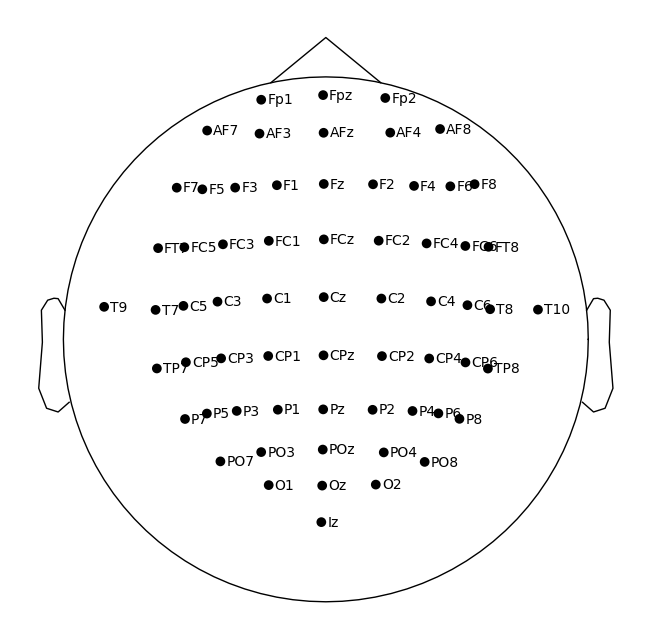

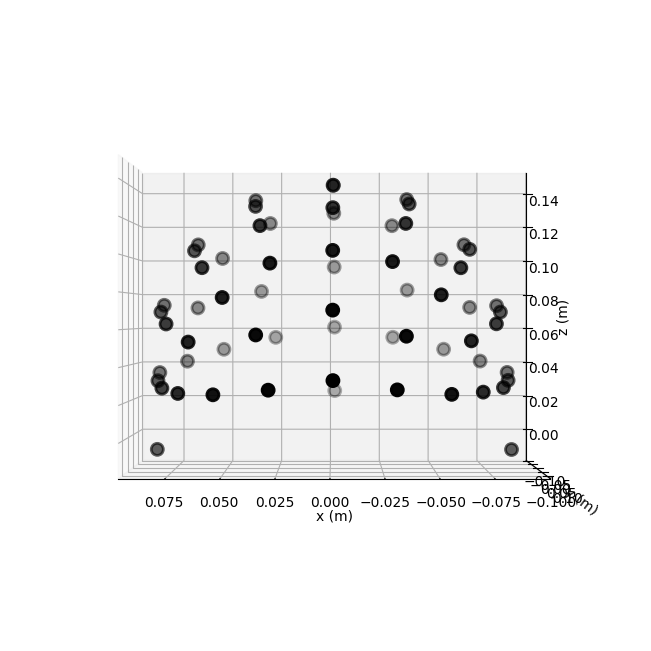

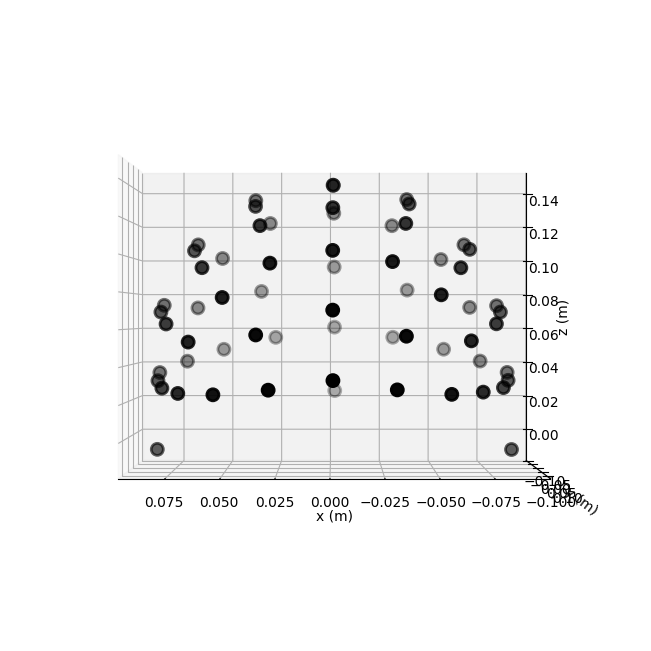

In [155]:
raw.plot_sensors(show_names=True, sphere=(0., 0., 0., 0.11))
raw.plot_sensors(kind='3d')          # 3D head


In [156]:
events, event_id = mne.events_from_annotations(raw)

print(event_id)  # Print event IDs to verify mapping

Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
{np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}


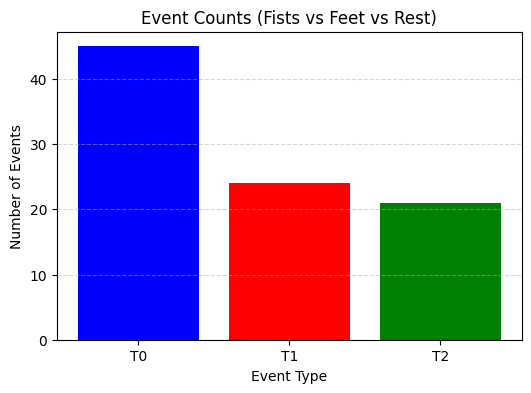

In [157]:
label_map = {v: k for k, v in event_id.items()}

unique, counts = np.unique(events[:, 2], return_counts=True)

labels = [label_map[u] for u in unique]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['blue', 'red', 'green'])
plt.title("Event Counts (Fists vs Feet vs Rest)")
plt.ylabel("Number of Events")
plt.xlabel("Event Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [158]:
events, event_id = mne.events_from_annotations(raw)
print(event_id)

Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
{np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}


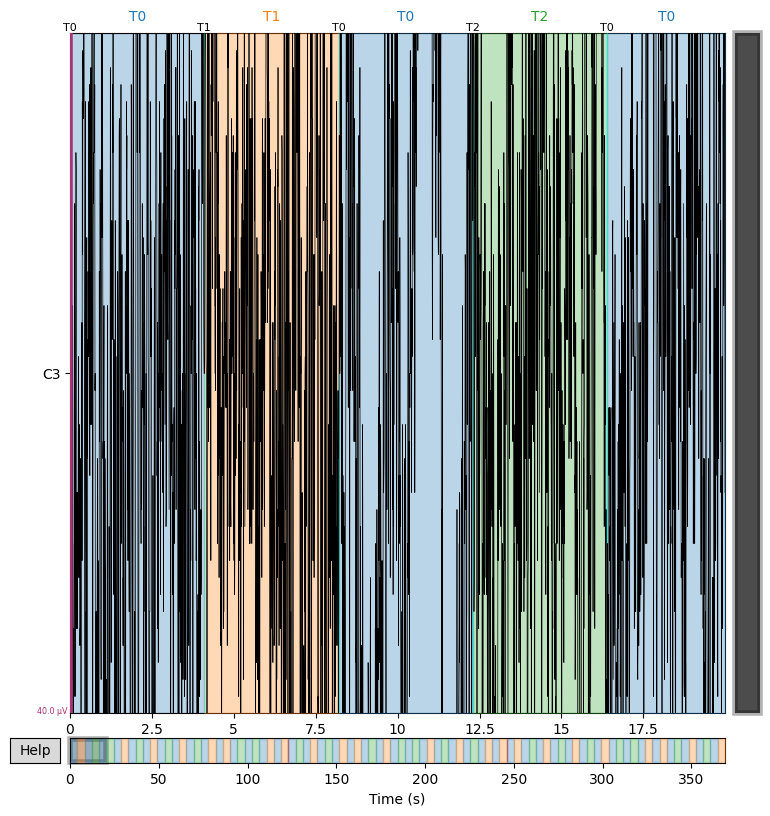

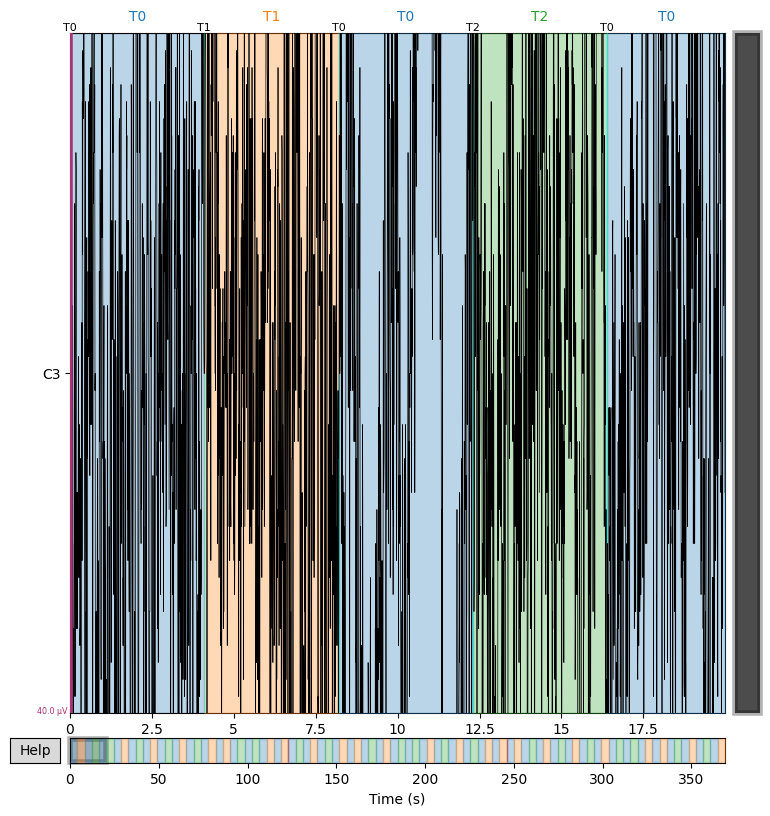

In [159]:
raw.plot(
    picks=['C3'],
    events=events,
    event_id=event_id,
    start=0,
    duration=20,
    show=False
)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


/Users/light/Desktop/university_work/aml/.aml/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


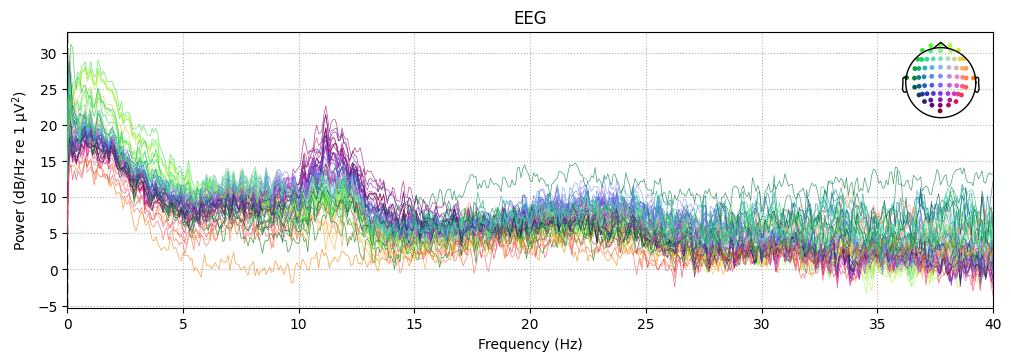

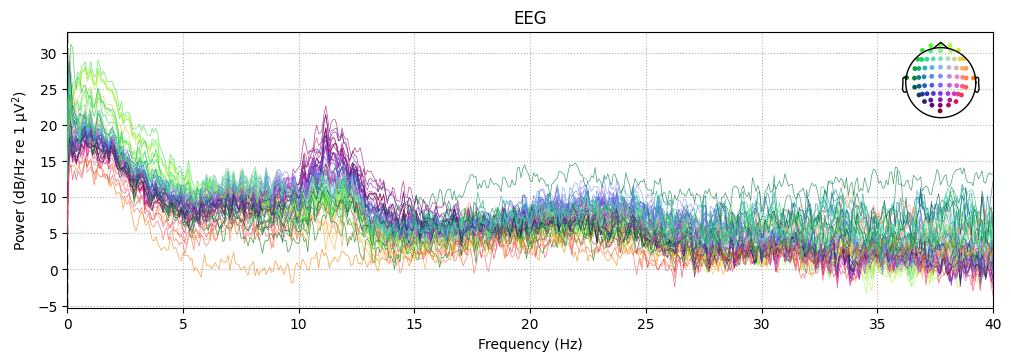

In [160]:
raw.plot_psd(fmax=40)

In [161]:
raw.annotations.to_data_frame()

,onset,duration,description
0,2009-08-12 16:15:00.000,4.1,T0
1,2009-08-12 16:15:04.100,4.1,T1
2,2009-08-12 16:15:08.200,4.1,T0
3,2009-08-12 16:15:12.300,4.1,T2
4,2009-08-12 16:15:16.400,4.1,T0
...,...,...,...
89,2009-08-12 16:20:48.500,4.1,T1
90,2009-08-12 16:20:52.600,4.1,T0
91,2009-08-12 16:20:56.700,4.1,T2
92,2009-08-12 16:21:00.800,4.1,T0


In [162]:
sfreq = raw.info['sfreq']  # 160 Hz

# Convert sample column to seconds
event_times_sec = events[:, 0] / sfreq


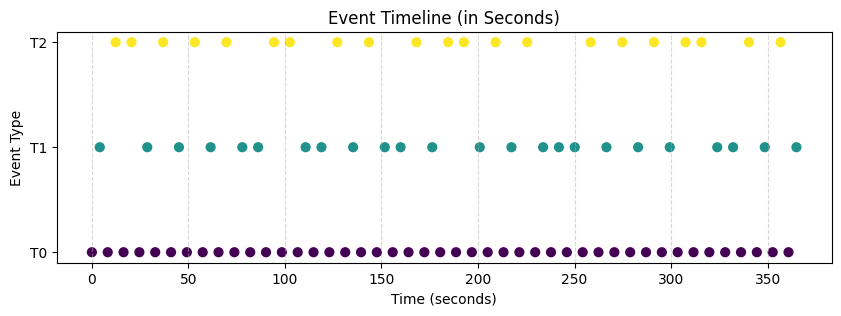

In [163]:
plt.figure(figsize=(10, 3))
plt.scatter(event_times_sec, events[:, 2], c=events[:, 2], cmap='viridis', s=40)

plt.yticks(list(event_id.values()), list(event_id.keys()))
plt.xlabel("Time (seconds)")
plt.ylabel("Event Type")
plt.title("Event Timeline (in Seconds)")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

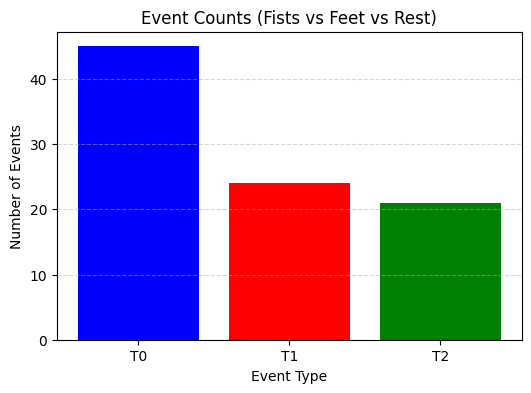

In [164]:
label_map = {v: k for k, v in event_id.items()}

unique, counts = np.unique(events[:, 2], return_counts=True)

labels = [label_map[u] for u in unique]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['blue', 'red', 'green'])
plt.title("Event Counts (Fists vs Feet vs Rest)")
plt.ylabel("Number of Events")
plt.xlabel("Event Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
